In [72]:
# THE DATASET FOR STOCK PRICE PREDICTION OF THE RENOWNED APPLE COMPANY IS
#FETCHED FROM KAGGLE

#LSTM (LONG-SHORT TERM MEMORY) IS USED TO ACCOMPLISH THIS TASK

#LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [73]:
# Load dataset
stockprediction_dataset = pd.read_csv('/content/sample_data/apple_stock.csv', parse_dates=['Date'], index_col='Date')

In [74]:
stockprediction_dataset.head(8)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
2014-01-09,19.528570,19.530714,19.119642,19.161428,16.798664,279148800
2014-01-10,19.279642,19.314285,18.968214,19.033571,16.686569,304976000
2014-01-13,18.925358,19.375000,18.924286,19.133215,16.773926,378492800


In [75]:
stockprediction_dataset.tail(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-24,173.050003,173.669998,171.449997,173.440002,173.211807,43816600
2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000
2023-10-26,170.369995,171.380005,165.669998,166.889999,166.670425,70625300
2023-10-27,166.910004,168.960007,166.830002,168.220001,167.998672,58499100
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.065933,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.545319,44846000


In [76]:
stockprediction_dataset.shape

(2475, 6)

In [77]:
stockprediction_dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [78]:
stockprediction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2475 entries, 2014-01-02 to 2023-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2475 non-null   float64
 1   High       2475 non-null   float64
 2   Low        2475 non-null   float64
 3   Close      2475 non-null   float64
 4   Adj Close  2475 non-null   float64
 5   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.4 KB


In [79]:
stockprediction_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [80]:
#we have to see if there are missing values in the dataset

print("the number of missing values in the dataset is=")
print(stockprediction_dataset.isnull().sum())

# the missing value of a column will be replaced with the column's mean

stockprediction_dataset.fillna(stockprediction_dataset.mean(), inplace=True)

the number of missing values in the dataset is=
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


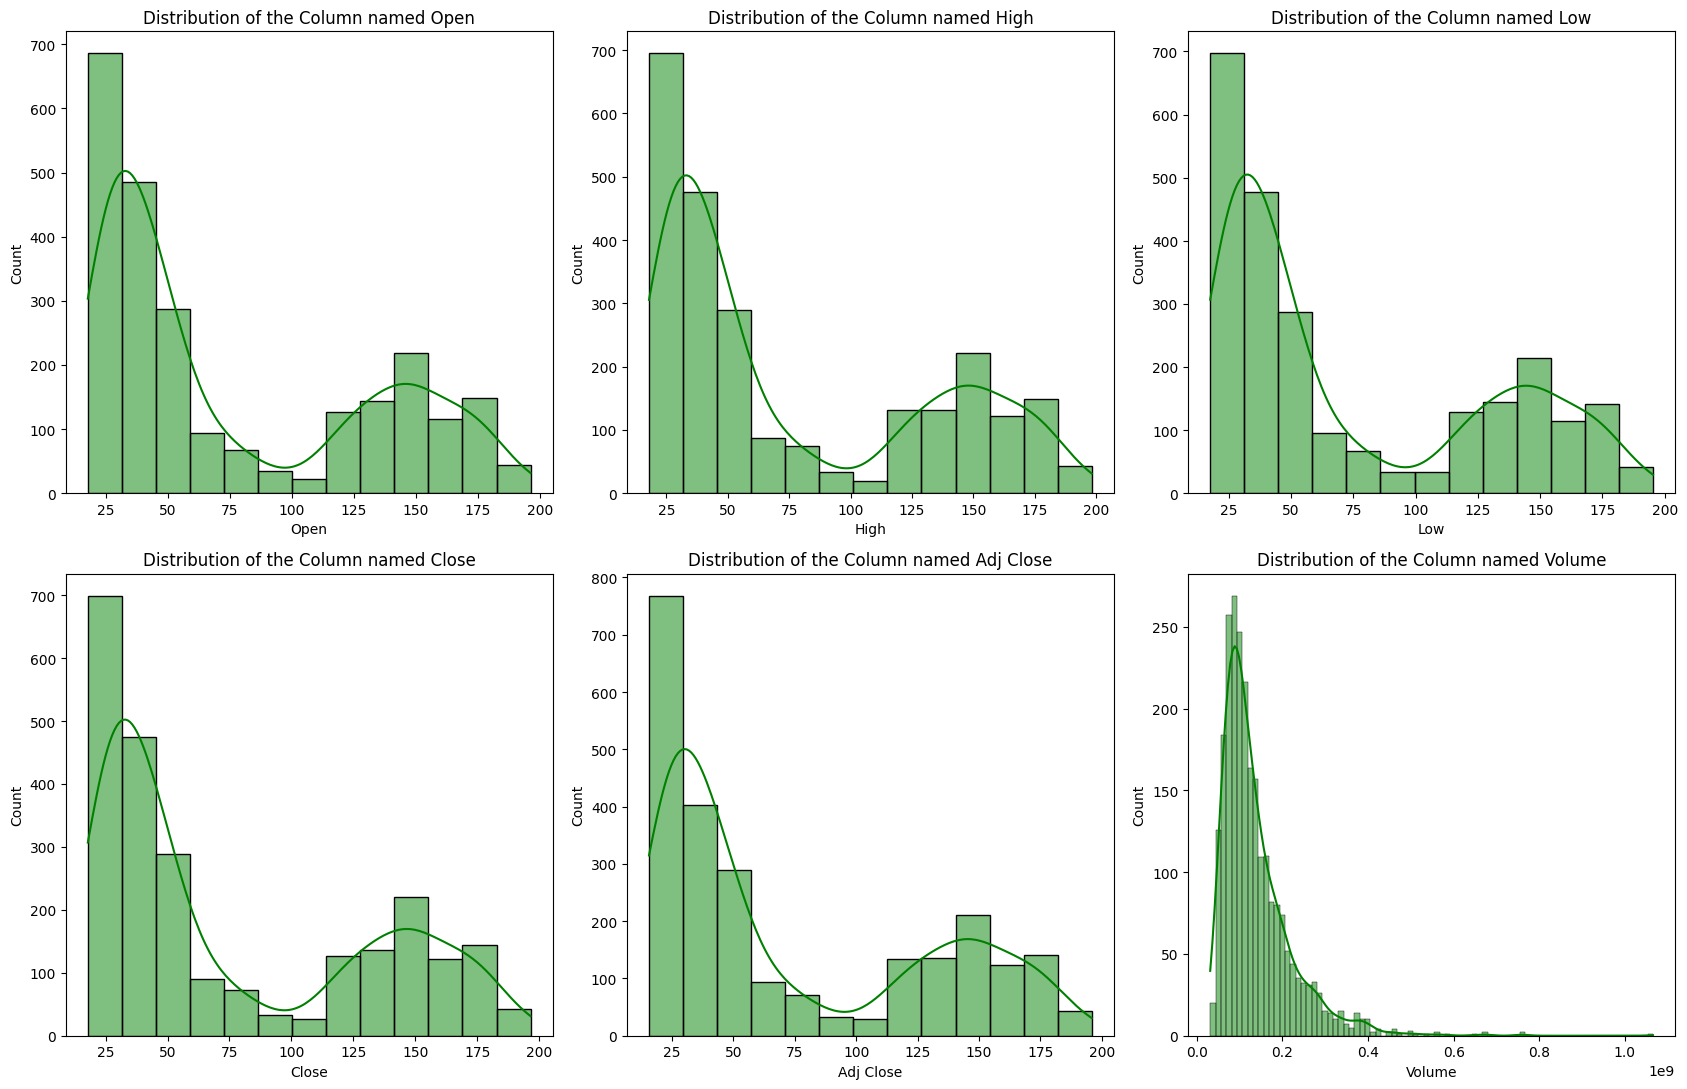

In [81]:
# histograms will be shown for each column

dataset_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
plt.figure(figsize=(17, 11))
for j, colu in enumerate(dataset_columns):
    plt.subplot(2, 3, j + 1)
    sns.histplot(stockprediction_dataset[colu], kde=True, color='green')
    plt.title(f'Distribution of the Column named {colu}')
plt.tight_layout()
plt.show()

In [82]:

# use the 'close price' column for making predictions

mydataset =stockprediction_dataset [['Close']].values

# data normalization

sca = MinMaxScaler(feature_range=(0, 1))
sca_data = sca.fit_transform(mydataset) #used to represent scaled data


In [83]:
# now ,seqences will be created

def sequence_creation(mydataset, sequence_length):
    xs, ys = [], []
    for i in range(len(mydataset) - sequence_length):
        x = mydataset[i:i + sequence_length]
        y = mydataset[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 60
X, y = sequence_creation(sca_data, sequence_length)

In [84]:
# the data will be split into training and testing set

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [85]:
#AN LSTM (LONG-SHORT TERM MEMORY) MODEL WILL BE BUILT NOW

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
# MODEL TRAINING

history = model.fit(X_train, y_train, epochs=65, batch_size=32, validation_split=0.1)


Epoch 1/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0067 - val_loss: 7.3055e-04
Epoch 2/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3421e-04 - val_loss: 7.0269e-04
Epoch 3/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.3506e-04 - val_loss: 6.4217e-04
Epoch 4/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 2.7309e-04 - val_loss: 6.0893e-04
Epoch 5/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.7399e-04 - val_loss: 7.2117e-04
Epoch 6/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 2.1327e-04 - val_loss: 0.0010
Epoch 7/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.2947e-04 - val_loss: 5.7159e-04
Epoch 8/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.7475e-04 - val_loss: 6.4058e-04
Epoch 9/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.8061e-04 - val_loss: 0.0012
Epoch 10/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.2133e-04 - val_loss: 0.0024
Epoch 11/65
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 2.0070e-04 - val_loss: 3.

In [87]:
# PREDICTIONS
pred = model.predict(X_test)
pred = sca.inverse_transform(pred)
y_test = sca.inverse_transform(y_test)

# scores/evaluation metrics
rmse_score = np.sqrt(mean_squared_error(y_test, pred))
mse_score = mean_squared_error(y_test, pred)
mae_score = mean_absolute_error(y_test, pred)
r2_score = r2_score(y_test, pred)
mape_score = mean_absolute_percentage_error(y_test, pred)

#displaying the metrics achieved


print(f'RMSE score for LSTM= {rmse_score}')
print(f'MSE score for LSTM= {mse_score}')
print(f'MAE score for LSTM= {mae_score}')
print(f'R2 score for LSTM= {r2_score}')
print(f'MAPE score for LSTM={mape_score}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
RMSE score for LSTM= 3.5989856060704333
MSE score for LSTM= 12.952697392702165
MAE score for LSTM= 2.8992748536925386
R2 score for LSTM= 0.9511908236908708
MAPE score for LSTM=0.01779568912717241


In [88]:
# A DATAFRAME WILL BE CREATED FOR PREDICTIONS

predictions_dataframe = pd.DataFrame({
    'Date': stockprediction_dataset.index[-len(y_test):],
    'Actual Price': y_test.flatten(),
    'Predicted Price': pred.flatten()
})

print("\nPredictions vs Actual Stock Prices:")
print(predictions_dataframe.head())



Predictions vs Actual Stock Prices:
        Date  Actual Price  Predicted Price
0 2021-11-30    165.300003       158.016891
1 2021-12-01    164.770004       164.223358
2 2021-12-02    163.759995       163.984573
3 2021-12-03    161.839996       161.581146
4 2021-12-06    165.320007       159.503769


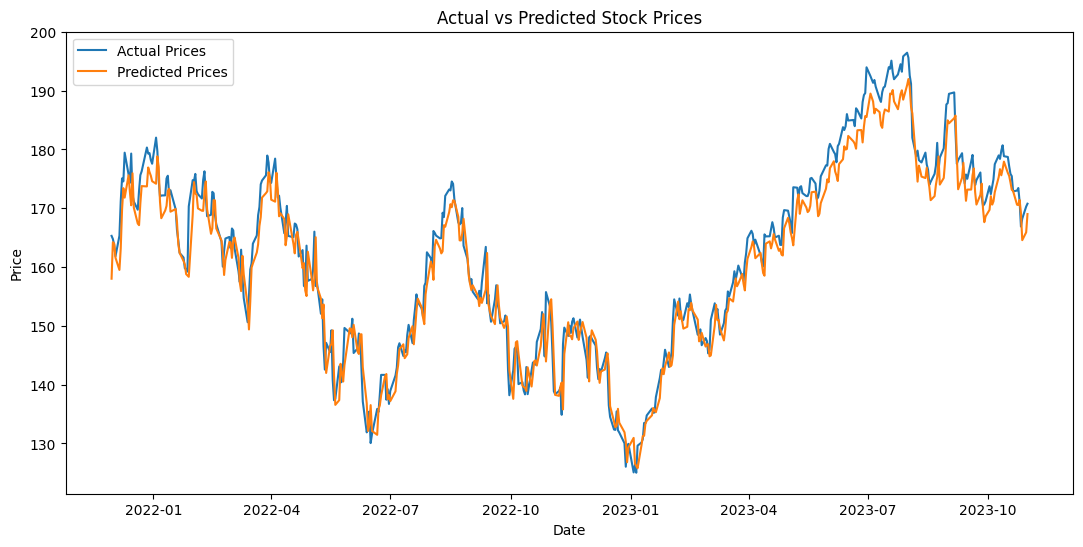

In [89]:
# a plot for predictions

plt.figure(figsize=(13, 6))
plt.plot(stockprediction_dataset.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(stockprediction_dataset.index[-len(pred):], pred, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


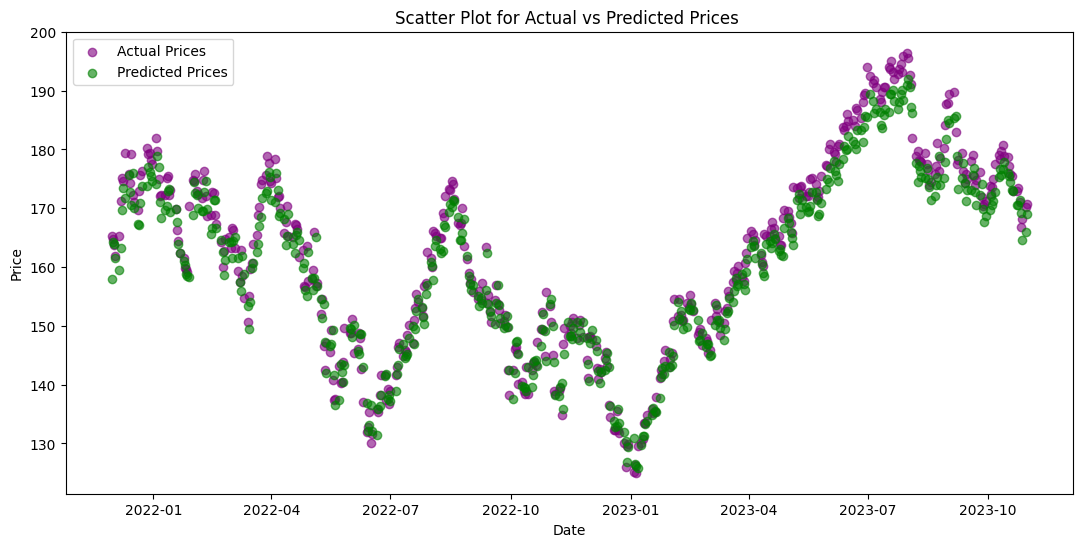

In [90]:
# Scatter plot for representing actual and predicted prices

plt.figure(figsize=(13, 6))
plt.scatter(stockprediction_dataset.index[-len(y_test):], y_test, color='purple', label='Actual Prices', alpha=0.6)
plt.scatter(stockprediction_dataset.index[-len(pred):], pred, color='green', label='Predicted Prices', alpha=0.6)
plt.title('Scatter Plot for Actual vs Predicted Prices ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()